In [1]:
%load_ext autoreload
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Math
from sympy.abc import x, y
from sympy import ordered, Matrix, hessian
from sympy.utilities.lambdify import lambdify

gradient = lambda f, v: Matrix([f]).jacobian(v)

In [2]:
func = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
v = list(ordered(func.free_symbols))
display(func)
display(v)

loss_fun = lambdify([v], func)

(x + y**2 - 7)**2 + (x**2 + y - 11)**2

[x, y]

In [3]:
grad = gradient(func, v)
grad_fun = lambdify([v], grad)
grad

Matrix([[4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14, 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22]])

In [4]:
hess = hessian(func, v)
hess_fun = lambdify([v], hess)
hess

Matrix([
[12*x**2 + 4*y - 42,          4*x + 4*y],
[         4*x + 4*y, 4*x + 12*y**2 - 26]])

0 [ 0 -5] 580
1 [-0.50625  0.5125 ] 157.14732766265868
2 [-2.49538118  0.89395219] 90.67200415621977
3 [-2.75880637  0.82930151] 88.83621895936066
4 [-0.65819363  3.23517444] 61.63821961799149
5 [-0.15106481  3.74247021] 99.33229573615695
6 [-1.42389358  2.40690221] 50.028092987757276
7 [-2.9789121   1.77769354] 46.61628690136008
8 [-1.67456627  3.15198446] 27.02906417655926
9 [-1.20625134  3.64355695] 60.52388657375114
10 [-2.41727107  2.40905138] 20.6092608777185
11 [-2.68779904  2.18834115] 26.51965247173923
12 [-1.80879052  3.15794414] 22.242419801417114
13 [-1.33591919  3.6536185 ] 56.06278166545296
14 [-2.59469462  2.3722707 ] 19.32941893871749
15 [-2.97820725  2.03361166] 34.14568043666003
16 [-2.26727646  2.7773879 ] 11.912182206306188
17 [-2.27607043  3.08497889] 7.535717018736811
18 [-2.5891994   2.79383695] 5.438128232486116
19 [-2.74748296  2.66496193] 7.6168495696282115
20 [-2.41202423  3.02901652] 4.692145426869583


E:\Projects\New\optim\optim\line_search.py:26: UserWarning: Maximum iteration for Armijo line search is reached.
  warnings.warn("Maximum iteration for Armijo line search is reached.")


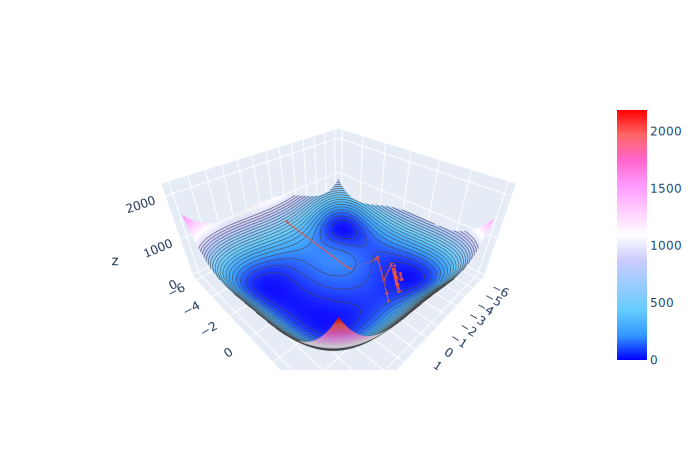

In [5]:
%autoreload
from optim.quasi_newton import dfp

rec = dfp(loss_fun, grad_fun, np.array([0, -5]), alpha=.9, tol=1e-3, max_iter=20)

import plotly.graph_objects as go

xx = np.linspace(-6, 6, 100)
yy = np.linspace(-6, 6, 100)
zz = [[loss_fun([xxx, yyy]) for xxx in xx] for yyy in yy]

trace = [loss_fun(i) for i in rec]

fig = go.Figure(go.Surface(
    contours = {
        "z": {"show": True, "start": 0, "end": 1000, "size": 50}
    },
    x = xx,
    y = yy,
    z = zz,
    colorscale='Picnic'))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": .5, "y": .5, "z": .5},
            "aspectratio": {"x": 0.6, "y": 0.6, "z": 0.3}
        })
fig.add_scatter3d(x=rec[:, 0], y=rec[:, 1], z=trace, connectgaps=True, marker_size=2)


fig.show('svg')

0 [ 0 -5] 580
1 [-0.5625  1.125 ] 131.01734924316406
2 [-3.17740245  1.34848879] 70.07002332950016
3 [-1.427258    3.23428683] 36.951930991036384
4 [-2.92065118  3.16584169] 0.4948627932015486
5 [-2.8394646   3.10706554] 0.06322302117218333
6 [-2.80273904  3.14390661] 0.006628108276076404
7 [-2.80523894  3.13127138] 5.488973952789285e-07
8 [-2.80512173  3.13131288] 4.34921514590663e-10
9 [-2.8051181   3.13131254] 2.002824402551427e-14
20 [-2.80511809  3.13131252] 2.0559613233266084e-18


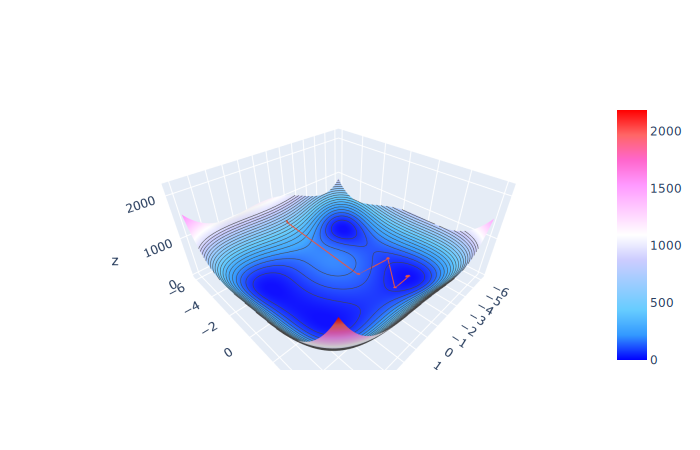

In [8]:
%autoreload
from optim.quasi_newton import bfgs0

rec = bfgs0(loss_fun, grad_fun, np.array([0, -5]), alpha=1., tol=1e-12, max_iter=20)

import plotly.graph_objects as go

xx = np.linspace(-6, 6, 100)
yy = np.linspace(-6, 6, 100)
zz = [[loss_fun([xxx, yyy]) for xxx in xx] for yyy in yy]

trace = [loss_fun(i) for i in rec]

fig = go.Figure(go.Surface(
    contours = {
        "z": {"show": True, "start": 0, "end": 1000, "size": 50}
    },
    x = xx,
    y = yy,
    z = zz,
    colorscale='Picnic'))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": .5, "y": .5, "z": .5},
            "aspectratio": {"x": 0.6, "y": 0.6, "z": 0.3}
        })
fig.add_scatter3d(x=rec[:, 0], y=rec[:, 1], z=trace, connectgaps=True, marker_size=2)


fig.show('svg')

0 [ 0 -5] 580
1 [-0.5625  1.125 ] 131.01734924316406
2 [-3.17740245  1.34848879] 70.07002332950012
3 [-2.47847135  2.72971426] 8.635371130380193
4 [-2.80282053  3.46882374] 5.077914889911689
5 [-2.81563856  2.97522971] 0.9380142523811239
6 [-2.71766405  3.00481322] 0.8458691661469815
7 [-2.79966438  3.15320974] 0.020543406871419975
8 [-2.81486717  3.14633206] 0.01202004370437763
9 [-2.80522751  3.12752643] 0.0005767849458603837
10 [-2.80343268  3.12830462] 0.00044914419694654084
11 [-2.80508024  3.13204577] 2.171276143574444e-05
12 [-2.80540854  3.13192228] 1.7466177189380923e-05
13 [-2.80512617  3.13116159] 9.198937825613925e-07
14 [-2.80506608  3.13118105] 7.740964460060102e-07
15 [-2.80511618  3.13134522] 4.3217330767265984e-08
16 [-2.80512759  3.13134208] 3.770980872263765e-08
17 [-2.80511855  3.13130512] 2.213780299118563e-09
18 [-2.8051141   3.13130616] 2.109818182514465e-09
19 [-2.80511802  3.13131407] 9.732181743209262e-11
20 [-2.80511876  3.13131376] 7.568480130609052e-11


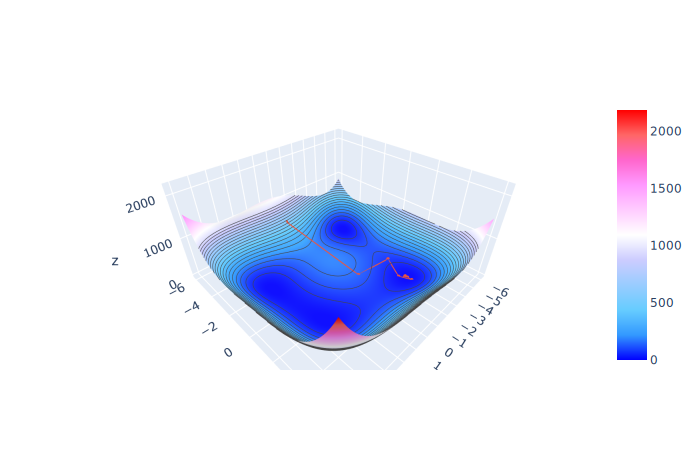

In [7]:
%autoreload
from optim.quasi_newton import l_bfgs0

rec = l_bfgs0(loss_fun, grad_fun, np.array([0, -5]), m = 2, max_step=1., tol=1e-12, max_iter=20)

import plotly.graph_objects as go

xx = np.linspace(-6, 6, 100)
yy = np.linspace(-6, 6, 100)
zz = [[loss_fun([xxx, yyy]) for xxx in xx] for yyy in yy]

trace = [loss_fun(i) for i in rec]

fig = go.Figure(go.Surface(
    contours = {
        "z": {"show": True, "start": 0, "end": 1000, "size": 50}
    },
    x = xx,
    y = yy,
    z = zz,
    colorscale='Picnic'))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": .5, "y": .5, "z": .5},
            "aspectratio": {"x": 0.6, "y": 0.6, "z": 0.3}
        })
fig.add_scatter3d(x=rec[:, 0], y=rec[:, 1], z=trace, connectgaps=True, marker_size=2)

fig.show("svg")